# Diseases MLR and corr with phenotypes 

Created 2022
Last modification: 01/05/2023

In [37]:
import function_diseases_associations as fda
import function_figures_associations as ffa

In [38]:
# REQUIRED FOR THE FIRST PART: COMPUTING THE BETAS AND PVALUES
compute_betas_pvalues= False #True
only_main_vascular_phenotypes = True
save_additional_figs = False
display_info=True
file_info_name='pheno_diseases_info.csv'
pheno_info_file = f'/SSD/home/sofia/retina-phenotypes/complementary/{file_info_name}'
diseases_file ='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/diseases_cov/2022_11_23_covar_fix_diseases_cov.csv'
pheno_file ='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/participant_phenotype/2022_11_23_covar_fix_z_corrected.csv'
output_dir ='/SSD/home/sofia/retina-phenotypes/complementary/disease_association/'

In [39]:
if only_main_vascular_phenotypes:
    list_phenotypes=["tau1_artery", "tau1_vein", "D_A_std", "D_V_std", "bifurcations", "VD_orig_artery", "VD_orig_vein", 
                     "ratio_VD", "mean_angle_taa" , "mean_angle_tva", "eq_CRAE", "eq_CRVE", "ratio_CRAE_CRVE",
                     "medianDiameter_artery", "medianDiameter_vein", "ratio_AV_medianDiameter"]
else:
    list_phenotypes=['AVScore_all', 'tau1_all', 'tau1_artery', 'tau1_vein', 'tau2_all', 'tau2_artery', 'tau2_vein', 
                     'tau4_all', 'tau4_artery', 'tau4_vein', 'D_std', 'D_A_std', 'D_V_std', 'D_median_CVMe', 'D_CVMe', 
                     'D_CVMe_A', 'D_CVMe_V', 'N_median_main_arteries', 'N_median_main_veins', 'arcLength_artery', 'arcLength_vein', 
                     'bifurcations', 'VD_orig_all', 'VD_orig_artery', 'VD_orig_vein', 'ratio_VD', 'slope', 'slope_artery', 'slope_vein', 
                     'mean_angle_taa', 'mean_angle_tva', 'medianCenter1_artery', 'medianCenter1_vein', 'medianCenter2_artery', 'medianCenter2_vein', 
                     'eq_CRAE', 'eq_CRVE', 'median_CRAE', 'median_CRVE', 'ratio_CRAE_CRVE', 'ratio_median_CRAE_CRVE', 'medianDiameter_all',
                     'medianDiameter_artery','medianDiameter_vein', 'ratio_AV_medianDiameter']

# FIRST PART: COMPUTE BETAS AND PVALUES

In [40]:
if compute_betas_pvalues:
    ####################### 1 - Read files:
    df_diseases, inf, list_diseases, list_diseases_bin, list_diseases_con, list_diseases_cat = fda.read_diseases_files(diseases_file, pheno_info_file)

    # Number of cases and controls per disease
    if display_info:
        print('Number of nans and ratio nans/no_nans:')
        for disease_name in list_diseases:
            fda.N_of_nans_and_nonans(df_diseases,disease_name)
            #plt.hist(df_diseases[disease_name])
            #plt.title(disease_name)
            #plt.show()

    # plot histogram diseases
    ffa.hist_diseases_plot(df_diseases, list_diseases, output_dir, save_additional_figs)

    ####################### 2 - Phenotypes:

    df_pheno =  fda.read_pheno(pheno_file)

    ####################### 3 - Merge diseases and phenotpyes
    df_pheno_dise = fda.merge_pheno_diseases(df_pheno, df_diseases)

    # Filtrate only by the phenotypes and diseases of interest
    df_pheno_dise = fda.filtrate_col(df_pheno_dise, list_phenotypes+list(list_diseases))

    # Replace nans by 0's in cases/controls
    df_pheno_dise = fda.column_startwith_replace_nan_by_0(df_pheno_dise)

    # Standardise continuous diseasesa and continuous phenotypes if not z-scored
    df_pheno_dise =  fda.std_contin_col(df_pheno_dise, list_diseases_con)

    # Check the type of variables and convert objects to numeric:

    ### convert to type numeric the columns that are not
    #df_pheno_dise['date_reported_atherosclerosis'] = pd.to_numeric(df_pheno_dise['date_reported_atherosclerosis']) # 'date_disorders_arteries_arterioles', 'date_AD', 'date_death',
    df_pheno_dise = fda.col_to_numeric(df_pheno_dise)

    ####################### 4 - Correlation
    ffa.corr_heatmap(df_pheno_dise, output_dir, save_additional_figs)

    ####################### 5 - MLR
    #  Linear/logistic regression:
    ### - Note-> Avoid using sklearn -> Pvalues and betas: scikit-learn's LinearRegression doesn't calculate this information but if needed one can extend the class to do it
    ### - Using from statsmodels.formula.api import ols, logit
    betas, log10p = fda.compute_pval_betas_LR(df_pheno_dise, inf, list_diseases, list_phenotypes)

    ####################### 6 - save betas, and p values
    #fda.save_betas_pval(betas, log10p, output_dir, What_type_phenotype)

else:
    'Skiping step of computing betas and pvalues'

## SECOND PART: VISUALIZE

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [42]:
type_used= 'main' #sup  'main'

In [43]:
if not compute_betas_pvalues:
    date='2022_11_23'
    ventile='covar_fix'
    output_dir ='/SSD/home/sofia/retina-phenotypes/complementary/disease_association/'
    diseases_dir ='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/diseases_cov/'
    date_2='2022_11_23'

    ## Read Cox
    cox_file_name = diseases_dir + date_2 + '_' + ventile + '__cox_full_results.csv'
    if only_main_vascular_phenotypes:
        betas = pd.read_csv(f'{diseases_dir}reg_betas_.csv', index_col=0)
        log10p = pd.read_csv(f'{diseases_dir}reg_log10p_.csv', index_col=0)

    else:    
        betas = pd.read_csv(f'{diseases_dir}reg_betas_sup.csv', index_col=0)
        log10p = pd.read_csv(f'{diseases_dir}reg_log10p_sup.csv', index_col=0)
    
    inf = pd.read_csv(pheno_info_file)


In [44]:
##### SUPPLEMENTARY PHENOTYPES
SUPPLEMENTARY_LABELS='tau1_all,tau1_artery,tau1_vein,ratio_AV_DF,tau2_all,tau2_artery,tau2_vein,tau4_all,tau4_artery,tau4_vein,D_std,D_A_std,D_V_std,D_CVMe,D_CVMe_A,D_CVMe_V,sd_mean_size,N_median_main_arteries,N_median_main_veins,arcLength_artery,arcLength_vein,bifurcations,VD_orig_all,VD_orig_artery,VD_orig_vein,ratio_VD,FD_all,FD_artery,FD_vein,mean_angle_taa,mean_angle_tva,eq_CRAE,eq_CRVE,median_CRAE,median_CRVE,CRAE,CRVE,ratio_CRAE_CRVE,ratio_median_CRAE_CRVE,ratio_standard_CRE,medianDiameter_all,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter'
SUPPLEMENTARY_NAMES='tortuosity,A tortuosity,V tortuosity,ratio tortuosity,tortuosity2,A tortuosity2,V tortuosity2,tortuosity3,A tortuosity3,V tortuosity3,std diameter,A std diameter,V std diameter,CVMe diameter,A CVMe diameter,V CVMe diameter,std norm diameter,A num main,V num main,A arc length,V arc length,bifurcations,vascular density,A vascular density,V vascular density,ratio vascular density,fractal dimension,A fractal dimension,V fractal dimension,A temporal angle,V temporal angle,A central retinal eq,V central retinal eq,A main diameter,V main diameter,A central retinal eq2,V central retinal eq2,ratio central retinal eq,ratio main diameter,ratio central retinal eq2,median diameter,A median diameter,V median diameter,ratio median diameter'

##### MAIN PHENOTYPES
MAIN_LABELS='mean_angle_taa,mean_angle_tva,tau1_vein,tau1_artery,ratio_AV_DF,eq_CRAE,ratio_CRAE_CRVE,D_A_std,D_V_std,eq_CRVE,ratio_VD,VD_orig_artery,bifurcations,VD_orig_vein,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter'
MAIN_NAMES='A temporal angle,V temporal angle,V tortuosity,A tortuosity,ratio tortuosity,A central retinal eq,ratio central retinal eq,A std diameter,V std diameter,V central retinal eq,ratio vascular density,A vascular density,bifurcations,V vascular density,A median diameter,V median diameter,ratio median diameter'

if type_used=='main':
    old = MAIN_LABELS
    new = MAIN_NAMES
elif type_used=='sup':
    old = SUPPLEMENTARY_LABELS
    new = SUPPLEMENTARY_NAMES

list_old_phenotypes=list(old.split(","))
list_new_phenotypes=list(new.split(","))

In [45]:
list_diseases_LinearR, list_diseases_LinearR_new, list_diseases_LogistR, list_diseases_LogistR_new, list_diseases_LogistR_both, list_diseases_LogistR_both_new = fda.info_subsplit_linear_log(inf)

list_diseases_LR, list_diseases_LR_new, list_diseases_cox, list_diseases_cox_new = fda.info_subsplit_LR_cox(inf)

### Specific for Cox:
df_cox = pd.read_csv(cox_file_name, index_col=0) # columns needed  *_hr for hazard ratio, and *_pval
df_cox_log10p, df_cox_hazar_ratio = fda.cox_specific(betas, df_cox)

In [46]:
# Change the name of the columns and index in beta, log10 and cox:

list_logistic_cox = [j for i in [list(list_diseases_LogistR), list(list_diseases_cox)] for j in i] 
list_logistic_cox_new = [j for i in [list(list_diseases_LogistR_new), list(list_diseases_cox_new)] for j in i] 

log10p_logistic = fda.filter_rename_col_index(log10p, list_old_phenotypes, list_new_phenotypes, list_logistic_cox, list_logistic_cox_new, False)
betas_logistic = fda.filter_rename_col_index(betas, list_old_phenotypes, list_new_phenotypes, list_logistic_cox, list_logistic_cox_new, False)

log10p_linear = fda.filter_rename_col_index(log10p, list_old_phenotypes, list_new_phenotypes, list_diseases_LinearR, list_diseases_LinearR_new, False)
betas_linear = fda.filter_rename_col_index(betas, list_old_phenotypes, list_new_phenotypes, list_diseases_LinearR, list_diseases_LinearR_new, False)

#print(len(log10p_logistic), len(log10p_linear), len(df_cox_log10p))

In [47]:
df_cox_log10p = fda.filter_rename_col_index(df_cox_log10p, list_old_phenotypes, list_new_phenotypes, list_diseases_cox, list_diseases_cox_new, True)


In [48]:
df_cox_hazar_ratio = fda.filter_rename_col_index(df_cox_hazar_ratio, list_old_phenotypes, list_new_phenotypes, list_diseases_cox, list_diseases_cox_new, True)

## Figure used: Split by Cox, linear and logistic regression:

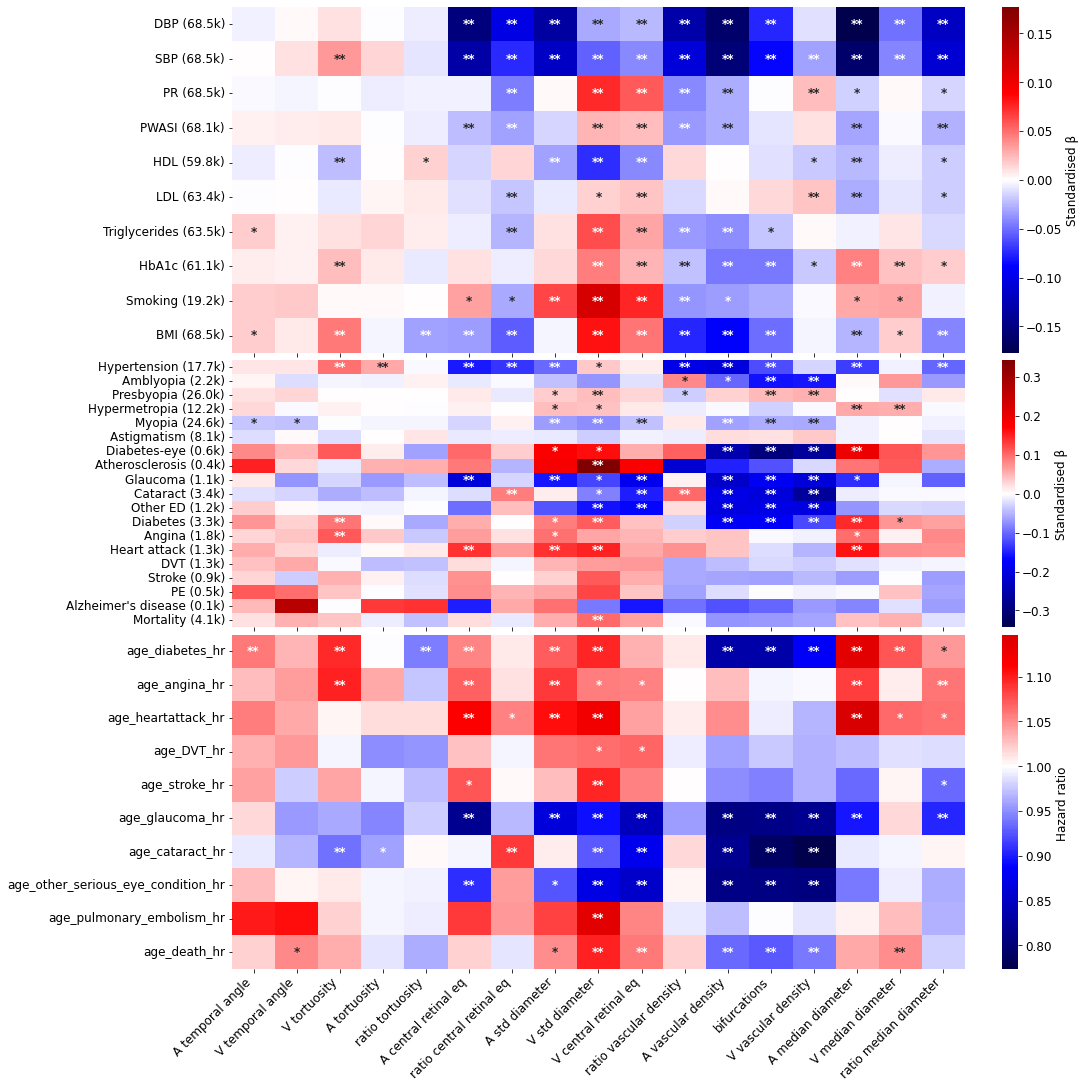

In [49]:
#linear
linear_log10p_copy, linear_log10p_copy2, linear_log10p_copy3 = ffa.plot_pvalues_signif_values(log10p_linear)
#logistic simplified
log_log10p_copy, log_log10p_copy2, log_log10p_copy3 = ffa.plot_pvalues_signif_values(log10p_logistic)
#cox
log10p_copy_cox, log10p_copy2_cox, log10p_copy3_cox = ffa.plot_pvalues_signif_values(df_cox_log10p)


ffa.figure_betas_pval_cox_linear_log(betas_linear, linear_log10p_copy3, betas_logistic, log_log10p_copy3, df_cox_hazar_ratio, log10p_copy3_cox, figsize_val=(15, 15), height_ratios_val = None, font_size_val='12')

## Figure 1: Split by linear and logistic regression:

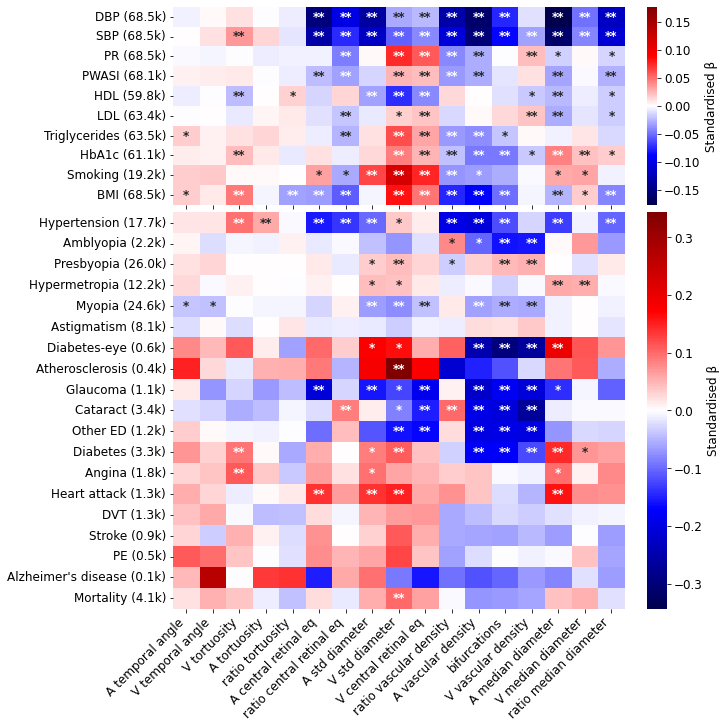

In [55]:
linear_log10p_copy, linear_log10p_copy2, linear_log10p_copy3 = ffa.plot_pvalues_signif_values(log10p_linear)
log_log10p_copy, log_log10p_copy2, log_log10p_copy3 = ffa.plot_pvalues_signif_values(log10p_logistic)

ffa.figure_betas_pval_linear_log(betas_linear, linear_log10p_copy3, betas_logistic, log_log10p_copy3, figsize_val=(10, 10), height_ratios_val = None, font_size_val='12')

## Figure 2: All together

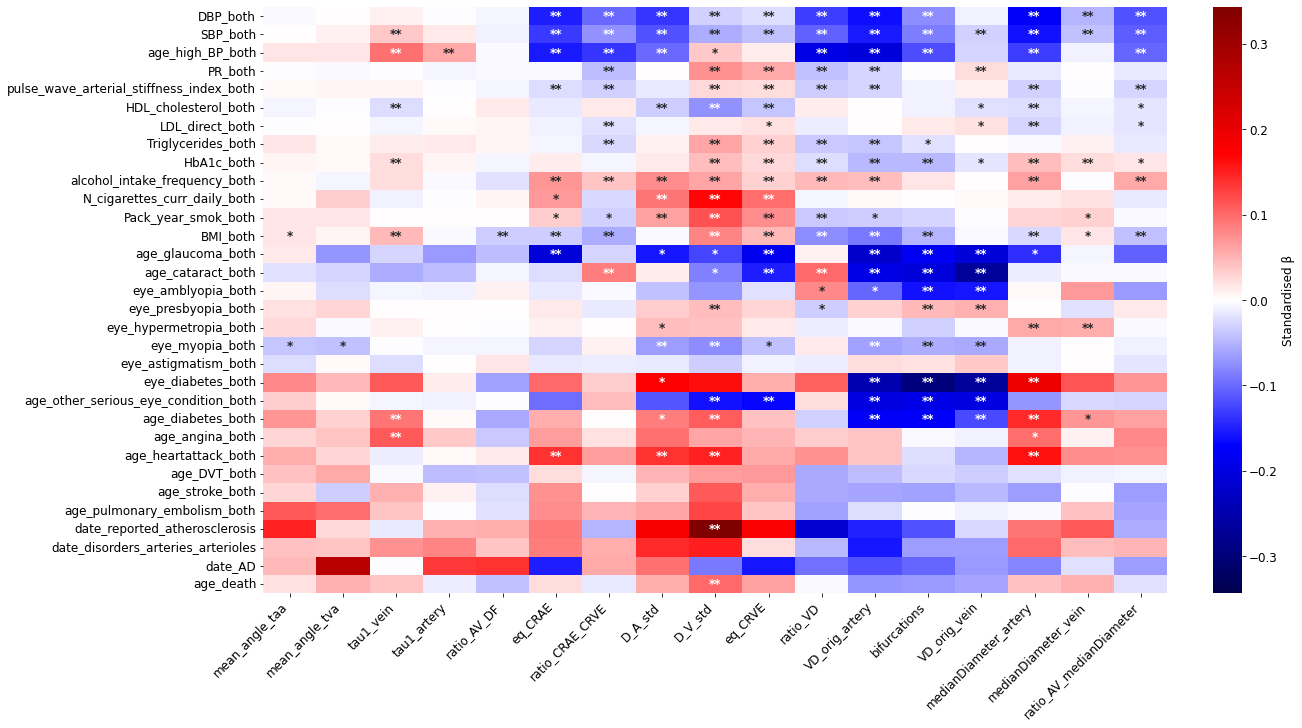

In [56]:
log10p_copy, log10p_copy2, log10p_copy3 = ffa.plot_pvalues_signif_values(log10p)
ffa.figure_betas_pval(betas, log10p_copy3, figsize_val=(18, 10), font_size_val='12')

## Figure 3:

[Text(0.5, 0, 'age_diabetes_hr'),
 Text(1.5, 0, 'age_angina_hr'),
 Text(2.5, 0, 'age_heartattack_hr'),
 Text(3.5, 0, 'age_DVT_hr'),
 Text(4.5, 0, 'age_stroke_hr'),
 Text(5.5, 0, 'age_glaucoma_hr'),
 Text(6.5, 0, 'age_cataract_hr'),
 Text(7.5, 0, 'age_other_serious_eye_condition_hr'),
 Text(8.5, 0, 'age_pulmonary_embolism_hr'),
 Text(9.5, 0, 'age_death_hr')]

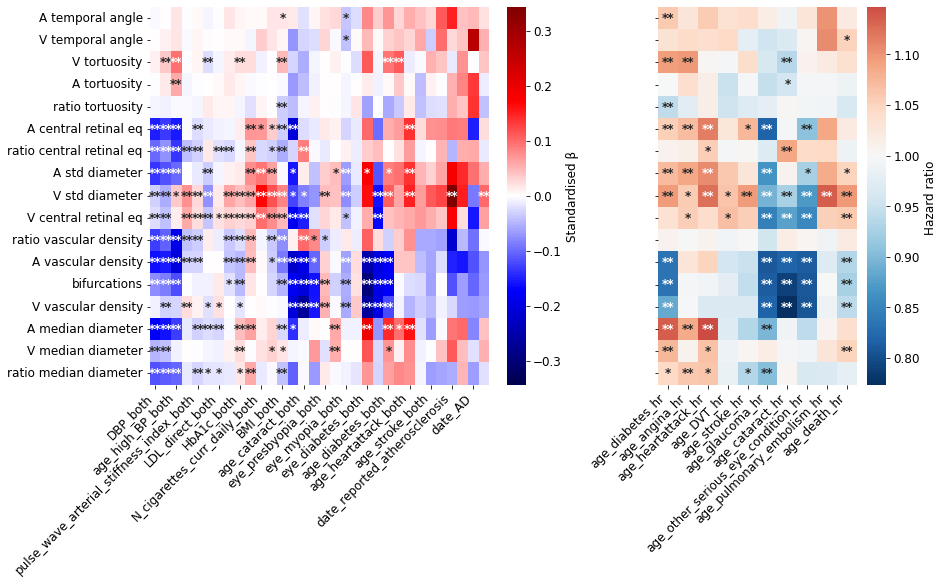

In [58]:
figsize_val=(13, 8)

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=figsize_val, gridspec_kw={'width_ratios': [1.7, 1]})
#gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
plt.rcParams['figure.constrained_layout.use'] = True
#ax1.yaxis.set_ticks_position('right')
plt.rcParams['font.size'] = '12'
fig1 = sns.heatmap(betas, 
            annot=log10p_copy3, #(log10p>Bonf_thresh).replace({True:'*', False:''}), 
            cbar=True, #If not False
            fmt="", annot_kws={'weight': 'bold'}, 
            vmin=-abs(betas).max().max(), 
            vmax=abs(betas).max().max(), 
            cmap='seismic',alpha=1.0, cbar_kws={'label': 'Standardised \u03B2'},
               ax=ax1)
fig1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha='right')

fig2 = sns.heatmap(df_cox_hazar_ratio, 
            annot=log10p_copy3_cox, #(log10p>Bonf_thresh).replace({True:'*', False:''}), 
            cbar=True, #False
            fmt="", annot_kws={'weight': 'bold'}, 
            vmin=(df_cox_hazar_ratio).min().min(), 
            vmax=(df_cox_hazar_ratio).max().max(), 
            center=1.0,
            cmap='RdBu_r', alpha=1.0, cbar_kws={'label': 'Hazard ratio '},
               ax=ax2)
fig2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, ha='right')

## Others -> Cases and controls

In [57]:
date2='2022-11-22'
N_cases_file_name = str(diseases_dir) + date2 + '_N_CASES_MLR_.csv'
print(N_cases_file_name)

df_pheno_dis_cov = pd.read_csv(pheno_cov_diseases_file)

list_all_old = list(list_diseases_LR) + list(list_diseases_LogistR_both)
list_all_new = list(list_diseases_LR_new) + list(list_diseases_LogistR_both_new)

#filter
df_pheno_dis_cov_MLR = df_pheno_dis_cov[list_all_old]

def filter_rename_col(df_,list_all_old, list_all_new,):
    df_.rename(columns=dict(zip(list_all_old, list_all_new)), inplace=True)
    #print(df_)
    return df_

df_pheno_dis_cov_MLR = filter_rename_col(df_pheno_dis_cov_MLR.copy(), list_all_old, list_all_new)
#df_pheno_dis_cov_MLR=df_pheno_dis_cov[list_diseases]

list_value=[]

for col in df_pheno_dis_cov_MLR.columns:
    print(col, df_pheno_dis_cov_MLR[col].notnull().sum())
    data={
         'disease': col,
         'N': df_pheno_dis_cov_MLR[col].notnull().sum()
     }
    list_value.append(data)
df_count_val = pd.DataFrame(list_value)
    #print(col, df_pheno_dis_cov_MLR[col].value_counts())
    #if col in list_binary:
    #    print(col, df_pheno_dis_cov_MLR[col].value_counts())

#df_pheno_dis_cov_MLR['Atherosclerosis']


def bar_plot(df_used, title_name, set_index_column):
    #ax= df_N_cases.plot()
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5),fancybox=True, shadow=True, ncol=5)
    ax = df_used.set_index(set_index_column).plot.bar(rot=90,  figsize=figsize_val_2, fontsize=16)
    ax.get_legend().remove()
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5),fancybox=True, shadow=True, ncol=5)
    #plt.savefig(save_files+str(title_name)+'.pdf', facecolor='white', bbox_inches='tight', pad_inches=0.1, dpi=150)

figsize_val_2=(16,3)
#plt.rcParams['font.size'] = '12'
bar_plot(df_count_val, 'Number of cases', 'disease')
#df_count_val_binary=df_count_val[df_count_val['disease'].isin(list_cases_controls)]
#bar_plot(df_count_val_binary, 'Number of cases', 'disease')

/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/diseases_cov/2022-11-22_N_CASES_MLR_.csv


NameError: name 'pheno_cov_diseases_file' is not defined